 Python factor analysis library (PCA, CA, MCA, MFA, FAMD) provided by Max Halford: https://github.com/MaxHalford/prince

In [1]:
import pandas as pd
import prince # mca library
import matplotlib.pyplot as plt

# X is a dataframe.
def run_mca(X):  
    mca = prince.MCA(
         n_components=2, # how many dimensions
         n_iter=50,
         copy=True,
         check_input=True,
         engine='auto',
         random_state=42)
    mca = mca.fit(X) 
    
    mca.plot_coordinates(
         X=X,
         ax=None,
         figsize=(6, 6),
         show_row_points=True, # true shows all people on the plot, false only variables.
         row_points_size=10,
         show_row_labels=False,
         show_column_points=True,
         column_points_size=30,
         show_column_labels=False,
         legend_n_cols=2
     )


In [2]:
# take subset of X
def getSubsetOfDF(X, columns):
    columns.append('INTNR') # use interview number (INTR) as unique ID
    Y = X.drop(columns =X.columns.difference(columns))
    Y = Y.set_index('INTNR')

    for c in Y.columns:
        Y[c] = Y[c].astype(str)
        if ('_' in c):
            Y[c.replace('_', "p")] = Y[c] # without this step, the mca function combines underscores into single variable
            Y = Y.drop(columns=[c])
    return Y

    



In [3]:
# tidy up the data set (removes about 30 people out of ~1970 respondents)
def clean9s(X):
    for c in X.columns:
        X = X[X[c] != '9']
    return X


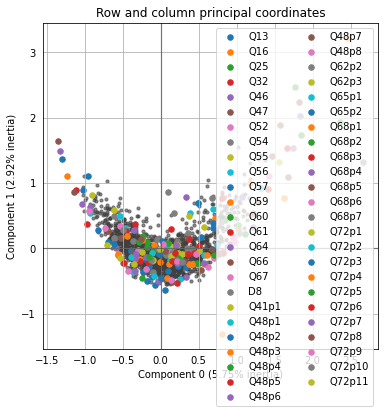

In [9]:
# import full survey data
FULL_DATA = pd.read_csv('data_11_10_21.csv', sep=';')

# column names for individual_traits
individual_traits = ['age_group', 'gender', 'D3_4', 'Q10', 'D6_1', 'D6_2', 'D6_3', 'D6_4']

# column names for each domain
social = ['Q56','Q57','Q59','Q60','Q61','Q64']
structural = ['Q13', 'Q25', 'Q68_1', 'Q68_2', 'Q68_3', 'Q68_4', 'Q68_5', 'Q68_6', 'Q68_7', 'Q72_1', 'Q72_2', 'Q72_3', 'Q72_4', 'Q72_5', 'Q72_6', 'Q72_7', 'Q72_8', 'Q72_9', 'Q72_10', 'Q72_11', 'D8']
identity = ['Q72_6']
spatial_use = ['Q16','Q32','Q41_1', 'Q46', 'Q47', 'Q65_1','Q65_2','Q16']
local_knowledge = ['Q48_1', 'Q48_2', 'Q48_3', 'Q48_4', 'Q48_5', 'Q48_6', 'Q48_7', 'Q48_8', 'Q52', 'Q66', 'Q67']
cultural = ['Q54','Q55','Q62_2','Q62_3']

# dictionary
domains = {
    #"individual_traits":individual_traits,
    "social": social,
    "structural": structural,
    "identity": identity,
    "spatial_use": spatial_use,
    "local_knowledge": local_knowledge,
    "cultural": cultural
}

allDomains =[]

# run mca
for domain in domains:
    columns = domains[domain] # access dictionary value. i.e the columns
    allDomains.append(columns)


    
allQuestions = sum(allDomains, [])

X = getSubsetOfDF(FULL_DATA, allQuestions)
X = clean9s(X)
run_mca(X)    

# run mca
#for domain in domains:
    #columns = domains[domain] # access dictionary value. i.e the columns
    #X = getSubsetOfDF(FULL_DATA, columns)
    #X = clean9s(X)
    #run_mca(X)

